<a href="https://colab.research.google.com/github/k2h2j3/My-First-AI/blob/master/testcatdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from matplotlib.cbook import flatten

#초기화를 위한 seed 설정
import numpy as np
import tensorflow as tf


#데이터 셋
train_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/train'
test_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/test'
validation_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/validation'

train_dogs_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/train/dogs'
train_cats_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/train/cats'

test_dogs_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/test/dogs'
test_cats_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/test/cats'

validation_dogs_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/validation/dogs'
validation_cats_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/validation/cats'

#스케일링
train_gen = ImageDataGenerator( rescale = 1./255)
val_gen = ImageDataGenerator( rescale = 1./255)
test_gen = ImageDataGenerator( rescale = 1./255)

# flow_from_directory: 폴더에서 이미지 가져오기
# 폴더명, 이미지 크기, 한번에 변환 할 이미지 수, 라벨링 모드
# 이진분류 = binary, 다중 분류 = categorical 
# 라벨 번호는 0부터 시작(cat은 0, dog는 1)
train_generator = train_gen.flow_from_directory(train_dir,
                              target_size =(200,200),
                              batch_size=20,
                              class_mode = 'binary')
val_generator = val_gen.flow_from_directory( validation_dir,
                            target_size = (200,200),
                            batch_size=20,
                            class_mode =  'binary')
test_generator = test_gen.flow_from_directory( test_dir,
                            target_size = (200,200),
                            batch_size=20,
                            class_mode =  'binary')


seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

c_model = Sequential()

# 입력층(CNN)
# 특징을 도드라지게 해준다
c_model.add(Conv2D(filters = 16, # 사진에서 찾을 특성 개수
                   kernel_size = (3,3), # 한번에 확인할 픽셀의 수
                   input_shape = (200,200,3), # 입력 데이터의 크기
                   padding = 'same', # 가장 자리를 0으로 채움 
                  # same : 입력데이터의 크기와 동일하게 맞춰준다
                   activation = 'relu'))
#불필요한 부분 삭제
c_model.add(MaxPooling2D(pool_size = (2,2)))

c_model.add(Conv2D(filters = 32, # 사진에서 찾을 특성 개수
                   kernel_size = (3,3), # 한번에 확인할 픽셀의 수
                   input_shape = (200,200,3), # 입력 데이터의 크기
                   padding = 'same', # 가장 자리를 0으로 채움(입력이미지크기=출력이미지크기)
                  # same : 입력데이터의 크기와 동일하게 맞춰준다
                   activation = 'relu'))

c_model.add(MaxPooling2D(pool_size = (2,2)))

c_model.add(Conv2D(filters = 64, # 사진에서 찾을 특성 개수
                   kernel_size = (3,3), # 한번에 확인할 픽셀의 수
                   input_shape = (200,200,3), # 입력 데이터의 크기
                   padding = 'same', # 가장 자리를 0으로 채움(입력이미지크기=출력이미지크기)
                  # same : 입력데이터의 크기와 동일하게 맞춰준다
                   activation = 'relu'))

c_model.add(MaxPooling2D(pool_size = (2,2)))

c_model.add(Conv2D(filters = 64, # 사진에서 찾을 특성 개수
                   kernel_size = (3,3), # 한번에 확인할 픽셀의 수
                   input_shape = (200,200,3), # 입력 데이터의 크기
                   padding = 'same', # 가장 자리를 0으로 채움(입력이미지크기=출력이미지크기)
                  # same : 입력데이터의 크기와 동일하게 맞춰준다
                   activation = 'relu'))

c_model.add(MaxPooling2D(pool_size = (2,2)))

c_model.add(Conv2D(filters = 64, # 사진에서 찾을 특성 개수
                   kernel_size = (3,3), # 한번에 확인할 픽셀의 수
                   input_shape = (200,200,3), # 입력 데이터의 크기
                   padding = 'same', # 가장 자리를 0으로 채움(입력이미지크기=출력이미지크기)
                  # same : 입력데이터의 크기와 동일하게 맞춰준다
                   activation = 'relu'))

c_model.add(MaxPooling2D(pool_size = (2,2)))

# 1차원으로 데이터 축소
c_model.add(Flatten())

#은닉층
c_model.add(Dense(units=512, activation = 'relu'))

#출력층
c_model.add(Dense(units=1, activation= 'sigmoid'))



c_model.compile(loss='binary_crossentropy',
                optimizer = 'adam',
                metrics=['accuracy'])

c_histroy = c_model.fit_generator(generator=train_generator,
            steps_per_epoch=20,
            epochs=50,
            validation_data = val_generator,
            validation_steps = 3)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:124: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
20/20 [==============================] - 29s 1s/step - loss: 0.6970 - accuracy: 0.5025 - val_loss: 0.6897 - val_accuracy: 0.4833
Epoch 2/50
20/20 [==============================] - 26s 1s/step - loss: 0.6931 - accuracy: 0.4975 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 23s 1s/step - loss: 0.6900 - accuracy: 0.5500 - val_loss: 0.6822 - val_accuracy: 0.5167
Epoch 4/50
20/20 [==============================] - 24s 1s/step - loss: 0.6919 - accuracy: 0.5125 - val_loss: 0.6975 - val_accuracy: 0.4500
Epoch 5/50
20/20 [==============================] - 23s 1s/step - loss: 0.6947 - accuracy: 0.5025 - val_loss: 0.6932 - val_accuracy: 0.4833
Epoch 6/50
20/20 [==============================] - 22s 1s/step - loss: 0.6823 - accuracy: 0.5500 - val_loss: 0.6528 - val_accuracy: 0.6500
Epoch 7/50
20/20 [==============================] - 22s 1s/step - loss: 0.6906 - accuracy: 0.5500 - val_loss: 0.6946 - val_accuracy: 0.5167
Epoch 8/50
20/20 [==

[]

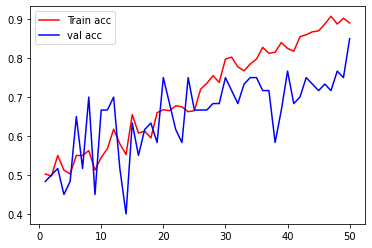

In [5]:
import matplotlib.pyplot as plt
acc = c_histroy.history['accuracy']
val_acc = c_histroy.history['val_accuracy']

epoch = range(1, len(acc)+1) #정확도의 개수

plt.plot(epoch, acc, c='red', label = 'Train acc') # 훈련 데이터 정확도
plt.plot(epoch, val_acc, c= 'blue', label = 'val acc') # 검증 데이터 정확도
plt.legend() #범례
plt.plot() 